<a href="https://colab.research.google.com/github/Gaurav-Kanse/Machine-Learning-/blob/main/Fake%20News%20Detection/FakeNewsDetectio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
import kagglehub
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-and-real-news-dataset' dataset.
Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [24]:
import os
print(os.listdir(path))

['True.csv', 'Fake.csv']


In [25]:
fake = pd.read_csv(os.path.join(path, "Fake.csv"))
real = pd.read_csv(os.path.join(path, "True.csv"))

print("Fake shape:", fake.shape)
print("Real shape:", real.shape)


Fake shape: (23481, 4)
Real shape: (21417, 4)


In [26]:
fake["label"]=0
real["label"]=1

df = pd.concat([fake, real]).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,title,text,subject,date,label
0,Swedish Mother KICKS Daughter Out Of Her Room ...,A tale of a mother and the dangerous religion ...,politics,"May 9, 2016",0
1,One Of Trump’s Closest Allies Just Called For...,This is why no one should vote for a Republica...,News,"August 30, 2016",0
2,President Trump Announces Decision on Paris Cl...,FOX News is announcing that President Trump be...,politics,"Jun 1, 2017",0
3,WATCH: MEXICAN-AMERICAN TRUMP Supporter DESTRO...,"I am deeply offended by your campaign, since ...",politics,"May 1, 2016",0
4,Angry Caller LOSES IT When Asked To Prove Med...,People who parrot and spread Trump s claims th...,News,"February 17, 2017",0


In [27]:
df["content"] = df["title"]+"| "+df["text"]

In [28]:
def clean_text(text):
  text=text.lower()
  text=re.sub(r'https?://\S+','',text)
  text=re.sub(r'[%s]' % re.escape(string.punctuation),'',text)
  text=re.sub(r'\n', '',text)
  return text

df["content"] = df["content"].apply(clean_text)

In [29]:
X = df["content"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1,2))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

1. ***Logistic Regression***

In [68]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [69]:
lr_pred = lr.predict(X_test_vec)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.9900890868596882


2.***Naive Bayes***

In [70]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [71]:
nb_pred = nb.predict(X_test_vec)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.9532293986636972


3. ***SVM***

In [72]:
svm = LinearSVC()
svm.fit(X_train_vec, y_train)

LinearSVC()

In [73]:
svm_pred = svm.predict(X_test_vec)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.9964365256124722


In [74]:
print(classification_report(y_test, svm_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4682
           1       1.00      1.00      1.00      4298

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



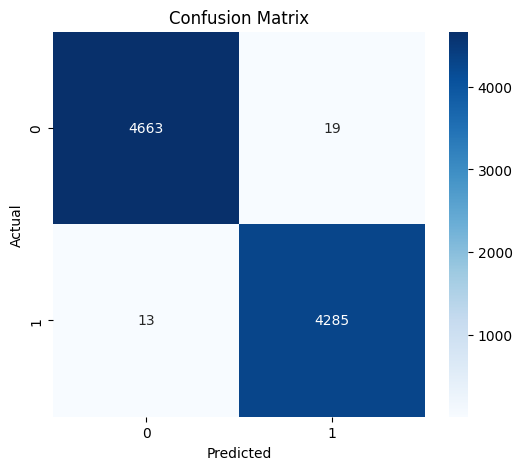

In [75]:
cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [76]:
def predict_news(test):
  text = clean_text(test)
  vectorized_text = vectorizer.transform([text])
  prediction = svm.predict(vectorized_text)

  if prediction[0] == 0:
    return "Fake News"
  else:
    return "Real News"

In [77]:
predict_news("Breaking: Government secretly planning alien invasion")

'Fake News'

In [78]:
predict_news("""
WASHINGTON (Reuters) - The finance ministry said on Tuesday it would introduce new fiscal measures aimed at reducing the national deficit, according to official statements.
""")


'Real News'

In [79]:
def predict_lr(test):
    text = clean_text(test)
    vec = vectorizer.transform([text])
    pred = lr.predict(vec)
    return "Fake News" if pred[0] == 0 else "Real News"


In [85]:
sample_text = """
Doctors claim that a simple household spice can permanently cure all forms of cancer within days, but major pharmaceutical companies are allegedly suppressing the discovery.
"""
print("SVM:", predict_news(sample_text))
print("LR :", predict_lr(sample_text))


SVM: Fake News
LR : Fake News


In [86]:
import joblib

joblib.dump(lr, "fake_news_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [87]:
from google.colab import files
files.download("fake_news_model.pkl")
files.download("vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>